

```
# Open csv file and data exploration
```



In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/task/sheet.csv')

# Basic data exploration
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
               age       balance          day     duration     campaign  \
count  4521.000000 

The "Subscription Counts" chart shows the class distribution of the target variable, indicating the balance between subscribers and non-subscribers.

The "Age Distribution" chart provides insight into the age distribution of the customers.

The "Marital Status Distribution" and "Education Level Distribution" charts show the distribution of marital status and education levels among customers.

The charts related to "Default on Credit," "Housing Loan," and "Personal Loan" illustrate the distribution of these binary features.

The "Contact Method Distribution" chart provides information about the methods used for the last marketing campaign.

The "Month of Last Contact Distribution" chart indicates when most customers were last contacted.

The "Result of Previous Campaign Distribution" chart offers insights into the outcomes of previous marketing campaigns.

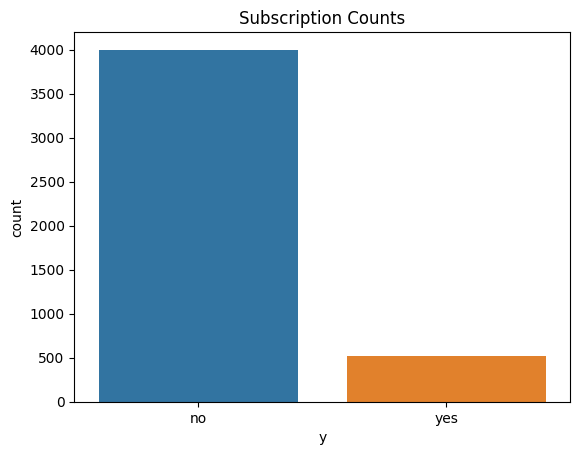

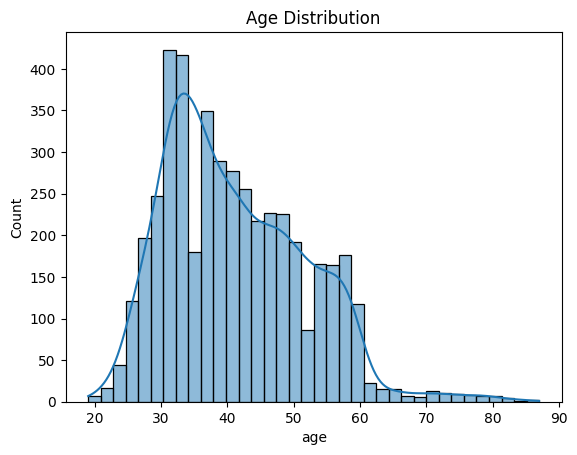

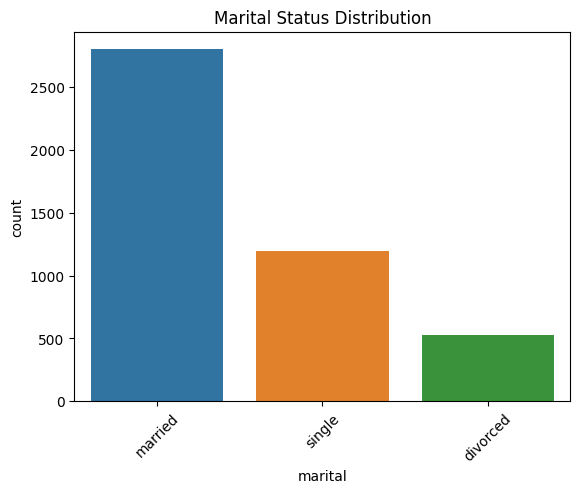

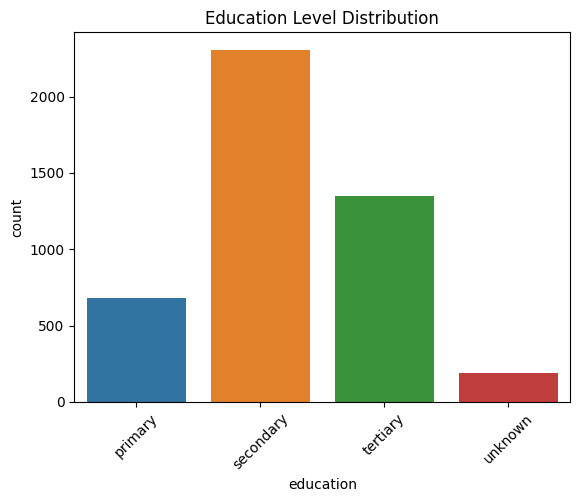

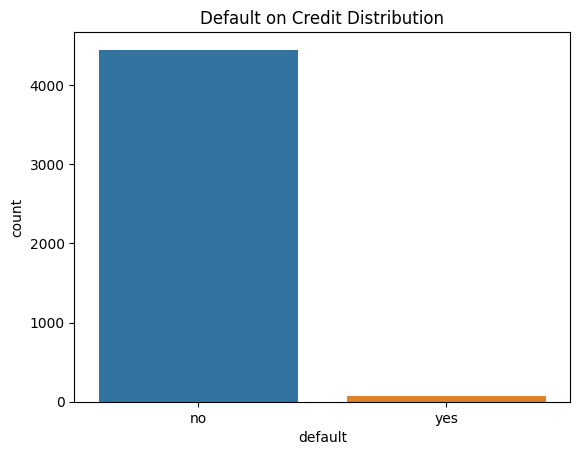

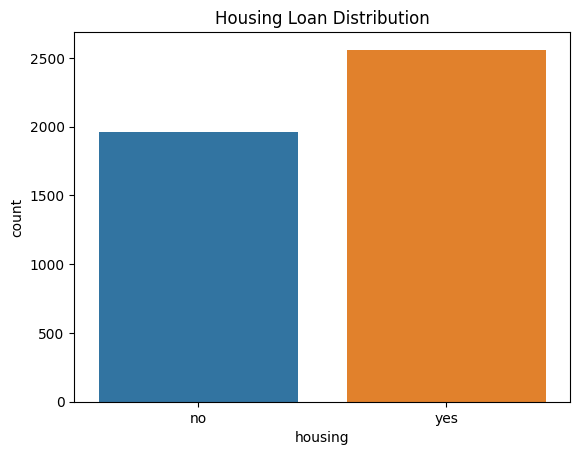

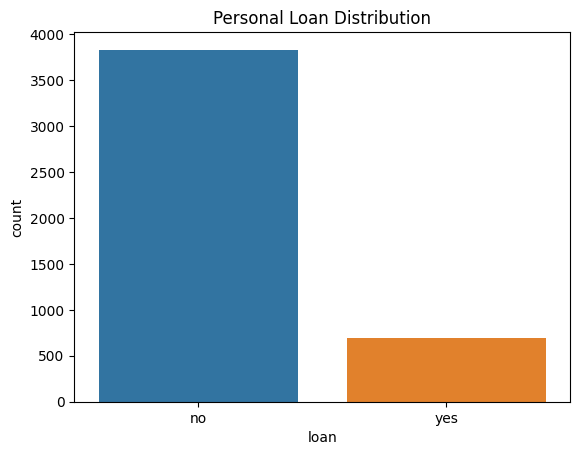

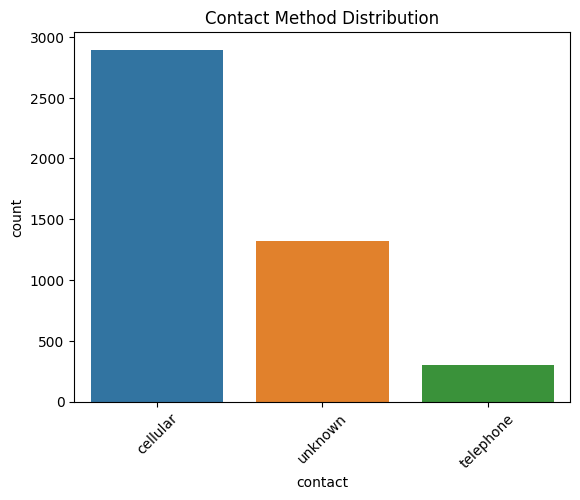

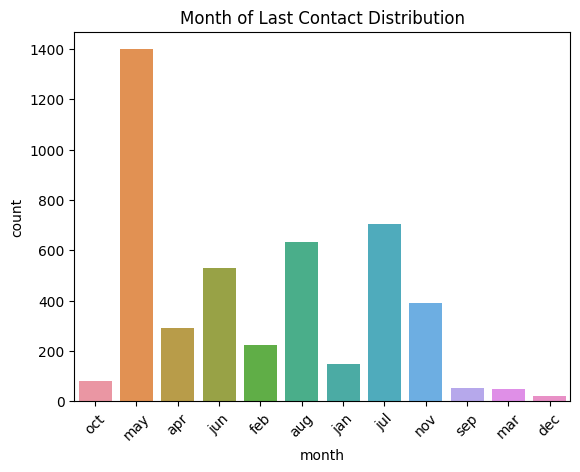

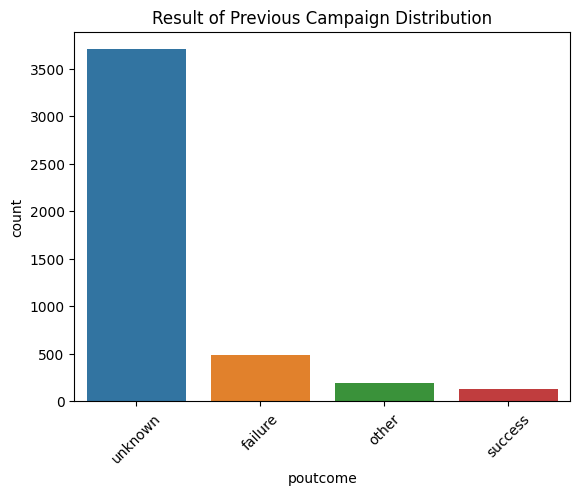

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/task/sheet.csv")  # Replace with the actual dataset file path

# Count of 'yes' and 'no' in the target variable 'Y'
sns.countplot(x='y', data=data)
plt.title('Subscription Counts')
plt.show()

# Age distribution
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Marital status distribution
sns.countplot(x='marital', data=data)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Education level distribution
sns.countplot(x='education', data=data)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

# Default on credit distribution
sns.countplot(x='default', data=data)
plt.title('Default on Credit Distribution')
plt.show()

# Housing loan distribution
sns.countplot(x='housing', data=data)
plt.title('Housing Loan Distribution')
plt.show()

# Personal loan distribution
sns.countplot(x='loan', data=data)
plt.title('Personal Loan Distribution')
plt.show()

# Contact method distribution
sns.countplot(x='contact', data=data)
plt.title('Contact Method Distribution')
plt.xticks(rotation=45)
plt.show()

# Month of last contact distribution
sns.countplot(x='month', data=data)
plt.title('Month of Last Contact Distribution')
plt.xticks(rotation=45)
plt.show()

# Result of the previous marketing campaign distribution
sns.countplot(x='poutcome', data=data)
plt.title('Result of Previous Campaign Distribution')
plt.xticks(rotation=45)
plt.show()


To visualize the relationship between marital status and the presence of personal loans, we can create a bar chart. This chart will show how many individuals in each marital status category have personal loans.

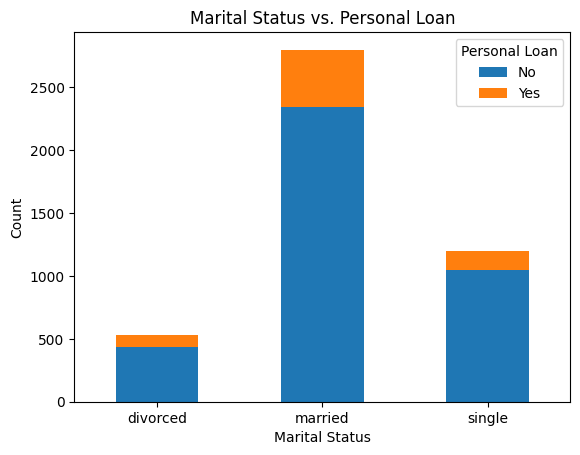

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/task/sheet.csv")  # Replace with the actual dataset file path

# Create a cross-tabulation of marital status and personal loan
marital_loan_cross = pd.crosstab(data['marital'], data['loan'])

# Create a bar chart to visualize marital vs. loan
marital_loan_cross.plot(kind='bar', stacked=True)
plt.title('Marital Status vs. Personal Loan')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()


To visualize the relationship between job type and the average balance, you can create a bar chart or a box plot.

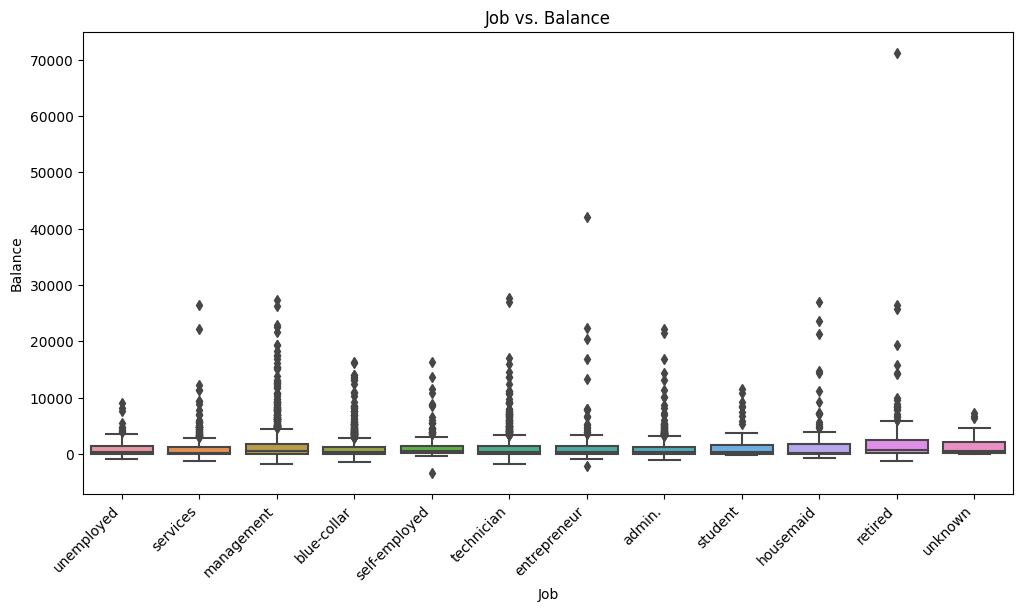

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/task/sheet.csv")  # Replace with the actual dataset file path

# Create a box plot to visualize job vs. balance
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance', data=data)
plt.title('Job vs. Balance')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45, ha='right')
plt.show()


# Decision Tree & Naive Bayes Model

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/task/sheet.csv")  # Replace with the actual dataset file path

# Data preprocessing
# Handle missing values (if any)
data.dropna(inplace=True)

# Define the features and target variable
X = data.drop("y", axis=1)  # Features
y = data["y"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of categorical and numeric columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Preprocess the data using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create Decision Tree and Naive Bayes models
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

naive_bayes_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Train the models
decision_tree_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Evaluate the models
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)

decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average='binary', pos_label='yes')
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes, average='binary', pos_label='yes')

decision_tree_recall = recall_score(y_test, y_pred_decision_tree, average='binary', pos_label='yes')
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes, average='binary', pos_label='yes')

decision_tree_f1 = f1_score(y_test, y_pred_decision_tree, average='binary', pos_label='yes')
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes, average='binary', pos_label='yes')

# Compare the results
print("Decision Tree Model:")
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Precision: {decision_tree_precision}")
print(f"Recall: {decision_tree_recall}")
print(f"F1 Score: {decision_tree_f1}")

print("\nNaive Bayes Model:")
print(f"Accuracy: {naive_bayes_accuracy}")
print(f"Precision: {naive_bayes_precision}")
print(f"Recall: {naive_bayes_recall}")
print(f"F1 Score: {naive_bayes_f1}")


Decision Tree Model:
Accuracy: 0.8972375690607735
Precision: 0.5229357798165137
Recall: 0.5816326530612245
F1 Score: 0.5507246376811594

Naive Bayes Model:
Accuracy: 0.8243093922651934
Precision: 0.2773722627737226
Recall: 0.3877551020408163
F1 Score: 0.3234042553191489
